In [24]:
import pandas as pd
import nltk
import re

In [63]:
#chunk_size=2000
#batch_no=1

#for chunk in pd.read_csv("spam_ham_dataset.csv",chunksize=chunk_size):
    #chunk.to_csv("spam_ham_dataset.csv" + str(batch_no) + '.csv', index=False)
    #batch_no += 1

In [60]:
#Read the dataset

mail=pd.read_csv("spam_ham_dataset.csv")  #,names=['num','label','text','label_num'])
mail.drop('Unnamed: 0',axis=1,inplace=True)
mail.drop('label_num',axis=1,inplace=True)
mail.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [50]:
print(mail.shape)
mail.info()

(5171, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [64]:
#removing all the columns except label and text

#mail.drop(["num","label_num"],axis=1,inplace=True)
mail['length']=mail['text'].apply(len)
mail.head(10)
#mail.shape

,label,text,length
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,spam,"Subject: photoshop , windows , office . cheap ...",414
4,ham,Subject: re : indian springs\r\nthis deal is t...,336
5,ham,Subject: ehronline web address change\r\nthis ...,480
6,ham,Subject: spring savings certificate - take 30 ...,2076
7,spam,Subject: looking for medication ? we ` re the ...,784
8,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,582
9,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",105


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

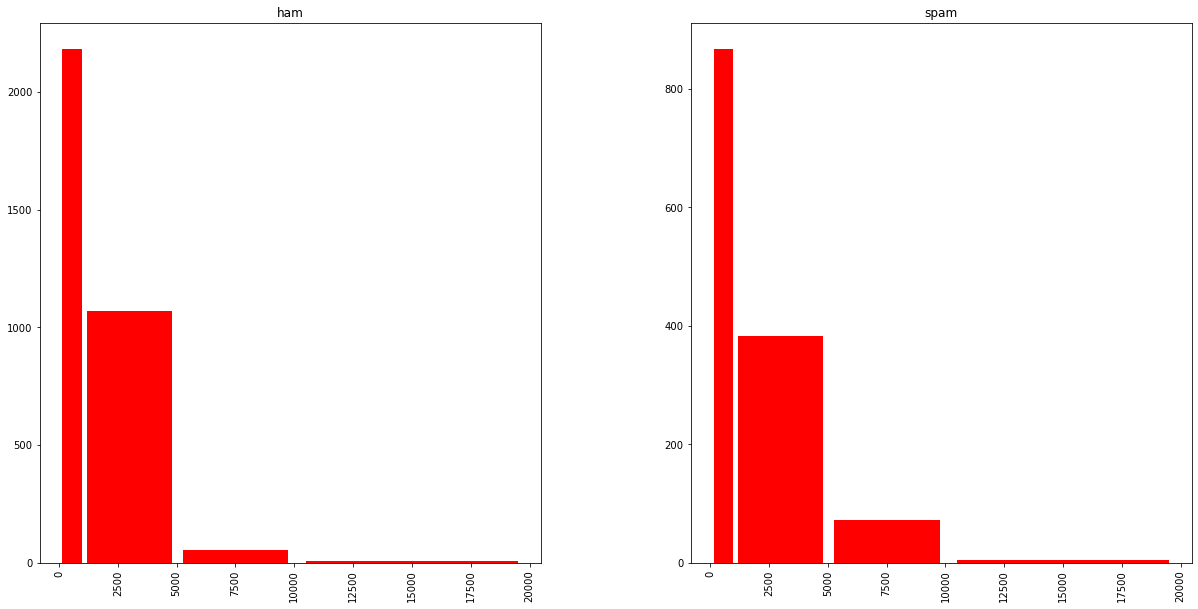

In [52]:
#MAKING HISTOGRAM

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mail.hist(column = 'length', by ='label',figsize=(20,10), bins = [100,1000,5000,10000,20000], rwidth=0.90, color='red')
#mail['length'].plot(bins=80,kind='hist')
#plt.hist(mail['length'], bins=[100,1000,5000,10000,20000], rwidth=0.95, color='r')

In [65]:
#DATA CLEANING

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(mail)):
    text=re.sub('[^a-zA-Z]',' ',mail['text'][i])
    text=text.lower()
    text=text.split()
    text=[ps.stem(word) for word in text if not word in stopwords.words('english')]
    text=' '.join(text)
    corpus.append(text)
#print(corpus)


In [66]:
#VECTORIZATION
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cv=CountVectorizer()
x=cv.fit_transform(corpus)
print(x.shape)

(5171, 37890)


In [67]:
#X_transform = x.transform()
#print(X_transform)
from sklearn.feature_extraction.text import TfidfTransformer
tf=TfidfTransformer()
tfidf=tf.fit(x)
X_tfidf=tfidf.transform(x)

(5171, 37890)


In [34]:
#DF= pd.DataFrame(x.toarray(),columns=cv.get_feature_names())
#DF.head(100)

In [60]:
#y=pd.get_dummies(mail['label'])
#y=y.iloc[:,0].values
#print(y)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, mail['label'], test_size=0.20, random_state = 50)    
clf = SVC(kernel='linear').fit(X_train, y_train)

In [82]:
print(X_train.shape)
print(X_test.shape)

(2585, 37890)
(2586, 37890)


In [83]:
predictions = clf.predict(X_test)
print('predicted', predictions)

predicted ['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']


In [84]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1834
        spam       0.96      0.99      0.98       752

    accuracy                           0.99      2586
   macro avg       0.98      0.99      0.98      2586
weighted avg       0.99      0.99      0.99      2586



In [85]:
print(confusion_matrix(y_test,predictions))

[[1806   28]
 [   7  745]]
